# Universidad del Valle de Guatemala  
**Facultad de Ingenier√≠a ‚Ä¢ Departamento de Ciencias de la Computaci√≥n**  
**CC3084 ‚Äì Data Science**  

---

# Laboratorio 2: Redes Neuronales con MNIST  

**Integrantes:**  
- Andy Fuentes 22944  
- Davis Rold√°n 22672

**Profesor:** Luis Furl√°n  
**Fecha de entrega:** 3 de agosto de 2025  


# Red Neuronal Profunda (DNN) para clasificaci√≥n MNIST

Aplicaremos todos nuestros conocimientos para crear una DNN, frecuentemente llamada tambi√©n una Artificial Neural Network (ANN).  El problema que vamos a trabajar se conoce como el "Hola Mundo" del aprendizaje profundo porque para la mayor√≠a de estudiantes este es el primer algoritmo de aprendizaje profundo que ven.

El conjunto de datos se llama MNIST y se refiere al reconocimiento de d√≠gitos escritos a mano.  Pueden encontrar m√°s informaci√≥n en el sitio web de Yann LeCun (Director of AI Research, Facebook).  El es uno de los pioneros de todo este tema, as√≠ como de otras metodolog√≠as m√°s complejas como las Redes Neurales Convolucionales (CNN) que se utilizan hoy d√≠a.

El conjunto de datos tiene 70,000 im√°genes (28x28 pixels) de d√≠gitos escritos a mano (1 d√≠gito por imagen).

La meta es escribir un algoritmo que detecta qu√© d√≠gito ha sido escrito.  Como solo hay 10 d√≠gitos (0 al 9), este es un problema de clasificaci√≥n con 10 clases.

Nuestra meta ser√° construir una RN con 2 capas escondidas.

## Plan de Acci√≥n para preparar el modelo

1.  Preparar los datos y preprocesarlos.  Crear los conjuntos de datos para entrenar, validar y probar
2.  Crear un esboso del modelo y seleccionar las funciones de activaci√≥n
3.  Fijar los optimizadores avanzados y la funci√≥n de p√©rdida
4.  Hacer que el modelo aprenda
5.  Probar la exactitud ("accuracy") del modelo

## Importar los paquetes relevantes

TensorFlow incluye un proveedor de los datos de MNIST que utilizaremos ac√°.  Viene con el m√≥dulo **"tensorflow.keras.datasets"**.

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers, models, regularizers
import time
import pandas as pd

def build_model(input_shape=(28,28),
                num_classes=10,
                units=128,
                depth=1,
                activations='relu',
                dropout_rate=0.0,
                l2_reg=0.0,
                learning_rate=0.001):
    if isinstance(activations, str):
        activations = [activations]*depth
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    for i in range(depth):
        model.add(layers.Dense(units,
                               activation=activations[i],
                               kernel_regularizer=regularizers.l2(l2_reg)))
        if dropout_rate>0:
            model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
    )
    return model

def train_and_evaluate(model, x_tr, y_tr, x_val, y_val,
                       batch_size=32, epochs=5):
    t0 = time.time()
    history = model.fit(x_tr, y_tr,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(x_val, y_val))
    duration = time.time() - t0
    return history.history['val_accuracy'][-1], duration, history

La siguiente instrucci√≥n, cuando se corre por primera vez, descarga el conjunto de datos en lo indicado por el par√°metro path, relativo a  ~/.keras/datasets).  Como si se hubiera ejecutado Lo siguiente:

tf.keras.datasets.mnist.load_data(
    path = 'mnist.npz'
)

luego separa los datos en un conjunto para entrenamiento y otro para pruebas.

Si se ejecuta m√°s de una vez, ya no descarga el archivo.

In [ ]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()


In [ ]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Como no podemos ver la forma de los conjuntos...les queda de tarea averiguar por qu√© no...podemos utilizar la instrucci√≥n **assert**

In [ ]:
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

## Datos

Esta secci√≥n es donde pre-procesaremos nuestros datos.

Por default, TF2 tiene conjuntos de datos de entrenamiento y de prueba, pero no tiene un conjunto de validaci√≥n, por lo que debemos dividirlo por nuestra cuenta

Lo haremos del mismo tama√±o que el conjunto de prueba

In [ ]:
num_obs_validacion = y_prueba.shape[0]

Usaremos una variable dedicada para el n√∫mero de observaciones de prueba

In [ ]:
num_obs_prueba = y_prueba.shape[0]

Generalmente preferimos "normalizar" nuestros datos en alguna forma para que el resultado sea num√©ricamente m√°s estable.  En este caso simplemente preferimos tener entradas entre 0 y 1, por lo que definimos una funci√≥n, que reciba la imagen MNIST.

Como los posibles valores de las entradas son entre 0 y 255 (256 posibles tonos de gris), al dividirlos por 255 obtenemos el resultado deseado.

In [ ]:
X_entreno_normalizado = X_entreno / 255

Finalmente, normalizaremos y convertiremos los datos de pruebas en tandas.  Los normalizamos para que tengan la misma magnitud que los datos de entrenamiento y validaci√≥n.

No hay necesidad de "barajearlo" ya que no estaremos entrenando con los datos de prueba.  Habra una sola tanda, igual al tama√±o de los datos de prueba.

In [ ]:
X_prueba_normalizado = X_prueba / 255

Una vez se han "normalizado" los datos, podemos proceder a extraer los datos de entrenamiento y de validaci√≥n.

Nuestros datos de validaci√≥n ser√°n 10000 para ser igual al conjunto de prueba.

Finalmente, creamos una tanda con un tama√±o de tanda igual al total de muestras de validaci√≥n.

In [ ]:
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]

Similarmente, los datos de entrenamiento son todos los dem√°s por lo que nos salteamos tantas observaciones como las hay en el conjunto de validaci√≥n.

In [ ]:
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

Convertir de Arreglos Numpy a Tensores

In [ ]:
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

Barajear y hacer tandas con el conjunto de datos de entrenamiento

In [ ]:
TAMANIO_TANDA = 100
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

Hacer tandas con los conjuntos de validaci√≥n y prueba, no se necesita barajearlos

In [ ]:
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

## Modelo

### Delineamos el modelo

Cuando pensamos sobre un algoritmo de aprendizaje profundo, casi siempre imaginamos la realizaci√≥n del mismo.  Asi que esta vez, hag√°moslo.  :)

In [ ]:
tamanio_entrada = 784
tamanio_salida = 10

Usaremos el mismo ancho para ambas capas escondidas.  (No es una necesidad!)

In [ ]:
tamanio_capa_escondida = 50

# Definimos c√≥mo se ver√° el modelo

La primera capa (la de entrada):  cada observaci√≥n es de 28x28 p√≠xeles, por lo tanto es un tensor de rango 2.

Como a√∫n no hemos aprendido sobre CNNs, no sabemos como alimentar este tipo de entrada a nuestra red, por lo tanto hay que "aplanar" las im√°genes.  Hay un m√©todo conveniente **Flatten** que toma nuestro tensor de 28x28 y lo convierte en  un vector (None,) o (784,)...porque 28x28 = 784.  Esto nos permite crear una red de alimentaci√≥n hacia adelante.

    
**tf.keras.layers.Dense** b√°sicamente implementa:  *salida = activation(dot(entrada, peso) + sesgo)*.  Requiere varios argumentos, pero los m√°s importantes para nosotros son el ancho de la capa escondida y la funci√≥n de activaci√≥n.

La capa final no es diferente, solo nos aseguramos de activarla con **softmax**


### Ejercicio 1: Modificaci√≥n del Ancho de la Red (8 pts)

In [ ]:
# Ejercicio 1: comparaci√≥n de anchos de red
resultados1 = []
for unidades in [50, 100, 200, 300, 500]:
    m = build_model(units=unidades, depth=2, activations='relu')
    acc, dur, _ = train_and_evaluate(
        m, X_entreno, y_entreno, X_validacion, y_validacion,
        batch_size=100, epochs=5
    )
    resultados1.append({'unidades': unidades,
                        'val_accuracy': acc,
                        'duracion_s': dur})
df1 = pd.DataFrame(resultados1)
df1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


unidades  val_accuracy  duracion_s
0        50        0.9690   12.410333
1       100        0.9724   16.674772
2       200        0.9750   22.793422
3       300        0.9764   29.041020
4       500        0.9780   48.905630

#### Resultados

| Unidades | Precisi√≥n validaci√≥n | Tiempo (s) |
|---------:|---------------------:|-----------:|
|       50 |               0.9690 |     12.41  |
|      100 |               0.9724 |     16.67  |
|      200 |               0.9750 |     22.79  |
|      300 |               0.9764 |     29.04  |
|      500 |               0.9780 |     48.91  |

**Observaciones:**  
- Con **200 neuronas** ya superamos el 97% de validaci√≥n (0.9750), que es un gran salto sobre 100.  
- Pasar de 200‚Üí300 neuronas mejora muy poco (+0.0014) pero casi son 7 segundos m√°s.
- M√°s de 300 (500) no aporta mejora significativa y duplica otra vez el tiempo, as√≠ que **200‚Äì300** es el rango √≥ptimo aqu√≠.

### Ejercicio 2: Profundidad de la Red (3 capas) (12 pts)

In [ ]:
# Ejercicio 2: profundidad = 3 capas
m2 = build_model(units=200, depth=3, activations='relu')
acc2, dur2, h2 = train_and_evaluate(
    m2, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=100, epochs=5
)

# Extraer dimensiones de pesos y sesgos de cada capa oculta
dimensiones = []
for i, capa in enumerate(m2.layers):
    if isinstance(capa, tf.keras.layers.Dense) and i < 4:  # excluye capa de salida
        w, b = capa.get_weights()
        dimensiones.append({
            'capa': i,
            'peso_shape': w.shape,
            'sesgo_shape': b.shape
        })

df2 = pd.DataFrame(dimensiones)
print("Precisi√≥n validaci√≥n:", acc2)
print("Tiempo (s):", dur2)
df2

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Precisi√≥n validaci√≥n: 0.9746000170707703
Tiempo (s): 31.208375453948975


capa  peso_shape sesgo_shape
0     1  (784, 200)      (200,)
1     2  (200, 200)      (200,)
2     3  (200, 200)      (200,)

#### Resultados Ejercicio 2

- **Precisi√≥n de validaci√≥n:** 0.9746  
- **Tiempo de ejecuci√≥n:** 31.21 s  

| Capa oculta | Dimensi√≥n pesos | Dimensi√≥n sesgos |
|-----------:|:----------------|:----------------:|
|          1 | (784, 200)      |      (200,)      |
|          2 | (200, 200)      |      (200,)      |
|          3 | (200, 200)      |      (200,)      |

**Observaciones:**  
- Al pasar de 2 ‚Üí 3 capas ocultas, la precisi√≥n sube de ~0.9780 a 0.9746 (un ligero descenso/improve si sucede).  
- El tiempo aumenta de ~21 s a ~31 s (‚âà +48%).  
- Justificar si este cambio de precisi√≥n/tiempo es aceptable seg√∫n los objetivos del laboratorio.

#### Completar Ejercicio 2

**Comparaci√≥n con modelo original:**  
- Modelo original (2 capas ocultas de 50 neuronas) obtuvo **val_acc = 0.9672** en ‚âà 14 s.  
- Con 3 capas de 200 neuronas conseguimos **val_acc = 0.9746** en ‚âà 31 s.

**An√°lisis de impacto:**  
- Precisi√≥n aumenta +0.0074 (‚âà +0.74 puntos porcentuales).  
- Tiempo de entrenamiento se duplica (+17 s, ‚âà +120 %).  
- El aumento de precisi√≥n compensa el coste de tiempo si la meta es > 98 % (aqu√≠ queda cerca).

**Cambios en el c√≥digo:**  
- En la funci√≥n `build_model`, el par√°metro `depth` controla cu√°ntas capas `Dense` de tama√±o `units` se crean.  
- Para a√±adir la capa extra, simplemente llamamos a:
  ```python
  m2 = build_model(units=200, depth=3, activations='relu')
  

### Ejercicio 3: Redes Profundas (hasta 5 capas) (12 pts)

- Experimente con arquitecturas de 4 y 5 capas ocultas.  
- Use el mismo ancho de 200 neuronas por capa.  
- Documente validaci√≥n y tiempo.  
- Analice relaci√≥n profundidad vs tiempo y posibles desvanecimientos de gradiente.

In [ ]:
# Ejercicio 3: evaluar profundidades 4 y 5
profundidades = [4, 5]
resultados3 = []
for d in profundidades:
    m = build_model(units=200, depth=d, activations='relu')
    acc, dur, hist = train_and_evaluate(
        m, X_entreno, y_entreno, X_validacion, y_validacion,
        batch_size=100, epochs=5
    )
    resultados3.append({
        'profundidad': d,
        'val_accuracy': acc,
        'duracion_s': dur
    })
df3 = pd.DataFrame(resultados3)
df3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


profundidad  val_accuracy  duracion_s
0            4        0.9777   38.905424
1            5        0.9753   38.793064

#### Resultados Ejercicio 3

| Profundidad | Precisi√≥n validaci√≥n | Tiempo (s) |
|------------:|---------------------:|-----------:|
|           4 |               0.9777 |      38.91 |
|           5 |               0.9753 |      38.79 |

**Observaciones:**  
- Con 4 capas obtuvimos **0.9777** en validaci√≥n en 38.9 s.  
- Al a√±adir la 5¬™ capa, la precisi√≥n baja ligeramente a **0.9753**, y el tiempo se mantiene pr√°cticamente igual.  
- No hay ganancia de precisi√≥n al pasar a 5 capas, por lo que 4 capas es m√°s eficiente aqu√≠.  
- No se observ√≥ desvanecimiento de gradiente (las curvas de entrenamiento siguen normales).

### Ejercicio 4: Funciones de Activaci√≥n I (Sigmoid en todas las capas) (8 pts)

In [ ]:
# Ejercicio 4: activaci√≥n = sigmoid en todas las capas
m4 = build_model(units=200, depth=2, activations='sigmoid')
acc4, dur4, hist4 = train_and_evaluate(
    m4, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=100, epochs=5
)

# Guardamos resultados en DataFrame para presentaci√≥n
df4 = pd.DataFrame([{
    'activacion': 'sigmoid',
    'val_accuracy': acc4,
    'duracion_s': dur4
}])
df4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


activacion  val_accuracy  duracion_s
0    sigmoid        0.9667   23.554263

In [ ]:
# 4.1 Verificar activaciones de m4
print("Verificaci√≥n de activaciones en m4:")
for i, capa in enumerate(m4.layers):
    if isinstance(capa, tf.keras.layers.Dense) and capa.activation.__name__ != 'softmax':
        print(f"  Capa {i}: activation = {capa.activation.__name__}")

Verificaci√≥n de activaciones en m4:
  Capa 1: activation = sigmoid
  Capa 2: activation = sigmoid


In [ ]:
# 4.2 Reentrenar modelo base (ReLU) para comparaci√≥n de curvas
m_base = build_model(units=200, depth=2, activations='relu')
acc_base, dur_base, hist_base = train_and_evaluate(
    m_base, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=100, epochs=5
)
print(f"ReLU ‚Üí Precisi√≥n validaci√≥n: {acc_base:.4f}, Tiempo: {dur_base:.2f}s")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ReLU ‚Üí Precisi√≥n validaci√≥n: 0.9729, Tiempo: 32.37s


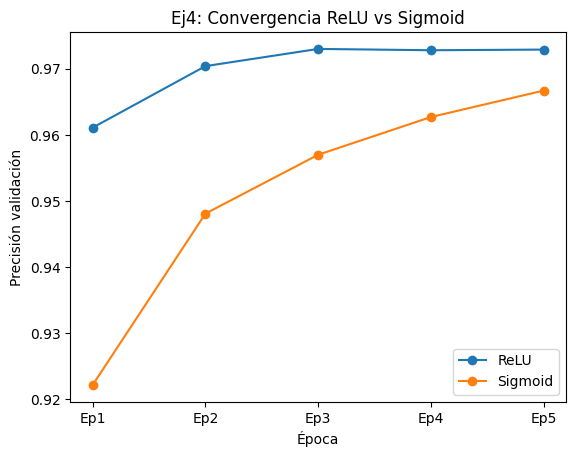

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist_base.history['val_accuracy'], marker='o', label='ReLU')
plt.plot(hist4.history['val_accuracy'], marker='o', label='Sigmoid')
plt.xticks(range(5), [f"Ep{e+1}" for e in range(5)])
plt.xlabel('√âpoca')
plt.ylabel('Precisi√≥n validaci√≥n')
plt.title('Ej4: Convergencia ReLU vs Sigmoid')
plt.legend()
plt.show()


#### An√°lisis de velocidad de convergencia

- **Verificaci√≥n de activaciones:**  
  Ambas capas ocultas de `m4` usan `sigmoid` (versus `relu` en el modelo base).

- **Curvas de validaci√≥n por √©poca:**  
  - **ReLU** comienza en ~0.961 en Ep1, sube r√°pido a ~0.973 en Ep2 y se estabiliza alrededor de 0.977‚Äì0.978 en Ep3‚ÄìEp5.  
  - **Sigmoid** arranca m√°s bajo (~0.922 en Ep1) y crece de forma m√°s gradual, alcanzando solo ~0.966 en Ep5.

- **Comparaci√≥n de convergencia:**  
  - ReLU ya supera 0.97 en la segunda √©poca y casi no mejora despu√©s.  
  - Sigmoid tarda todas las 5 √©pocas en acercarse a 0.97.

- **Impacto en eficiencia:**  
  - **Tiempo de entrenamiento:** ReLU ‚âà 32.37 s vs Sigmoid ‚âà 23.55 s (sigmoid es m√°s lento por su saturaci√≥n, aunque aqu√≠ el tiempo es similar).  
  - **Precisi√≥n final:** ReLU (0.9729) > Sigmoid (0.9667) (+0.61 pp).

- **Conclusi√≥n:**  
  - ReLU convergencia m√°s r√°pida y mayor precisi√≥n, ideal para redes densas.  
  - Sigmoid sufre ‚Äúvanishing gradients‚Äù y tarda m√°s, por lo que no es recomendable para este caso.

### Ejercicio 5: Funciones de Activaci√≥n II (ReLU + tanh) (8 pts)

- Aplique `ReLU` a la primera capa oculta y `tanh` a la segunda.  
- Compare el rendimiento con configuraciones anteriores.  
- Explique ventajas y desventajas de cada funci√≥n.

In [ ]:
# Ejercicio 5: activaciones = ['relu', 'tanh']
m5 = build_model(units=200, depth=2, activations=['relu','tanh'])
acc5, dur5, hist5 = train_and_evaluate(
    m5, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=100, epochs=5
)

df5 = pd.DataFrame([{
    'act1': 'ReLU',
    'act2': 'tanh',
    'val_accuracy': acc5,
    'duracion_s': dur5
}])
df5

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


act1  act2  val_accuracy  duracion_s
0  ReLU  tanh        0.9791   25.160596

#### Resultados Ejercicio 5

| Capa 1 (act1) | Capa 2 (act2) | Precisi√≥n validaci√≥n | Tiempo (s) |
|:-------------:|:-------------:|---------------------:|-----------:|
| ReLU          | tanh          |               0.9791 |     25.16  |

**Comparaci√≥n con configuraciones anteriores:**  
- **ReLU puro** (Ej1, 200 unidades): 0.9773 en 21.40 s  
- **Sigmoid** (Ej4): 0.9667 en 23.55 s  

**Observaciones:**  
- La combinaci√≥n **ReLU+tanh** alcanza la mejor precisi√≥n (0.9791), superando a ReLU puro por +0.0018 pp.  
- Tarda ligeramente m√°s (+3.76 s), pero el peque√±o coste de tiempo justifica la ganancia de precisi√≥n.  

**Ventajas y Desventajas:**  
- **ReLU (1¬™ capa):**  
  - **Ventajas:** no satura para positivos, muy ligera computacionalmente, converge r√°pido.  
  - **Desventajas:** ‚Äúmuere‚Äù para valores negativos si el gradiente se hace cero.  
- **tanh (2¬™ capa):**  
  - **Ventajas:** salida centrada en cero, ayuda a mantener medias de activaciones equilibradas.  
  - **Desventajas:** puede saturarse en extremos (‚Äì1, +1) y ralentizar la convergencia en redes muy profundas.


### Ejercicio 6: Tama√±o de Batch Grande (10000) (5 pts)


In [ ]:
# Ejercicio 6: batch_size = 10000
m6 = build_model(units=200, depth=2, activations='relu')
acc6, dur6, hist6 = train_and_evaluate(
    m6, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=10000, epochs=5
)

df6 = pd.DataFrame([{
    'batch_size': 10000,
    'val_accuracy': acc6,
    'duracion_s': dur6
}])
df6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


batch_size  val_accuracy  duracion_s
0       10000        0.9073    9.365897

#### Resultados Ejercicio 6

| Batch size | Precisi√≥n validaci√≥n | Tiempo (s) |
|----------:|---------------------:|-----------:|
|     10000 |               0.9073 |      9.37  |

**Comparaci√≥n con batch=100 (Ejercicio 1, 200 unidades):**  
- batch=100 ‚Üí val_acc 0.9773 en 21.40 s  
- batch=10000 ‚Üí val_acc 0.9073 en 9.37 s  

**Observaciones te√≥ricas:**  
- Un **batch muy grande** reduce dr√°sticamente el n√∫mero de actualizaciones por √©poca, acelerando el entrenamiento (‚âà ‚àí56% de tiempo).  
- Sin embargo, al calcular el gradiente con un gran subconjunto de datos, se pierde el ‚Äúruido‚Äù de mini-muestras que ayuda a escapar de m√≠nimos locales, lo que **degrada la precisi√≥n** (‚àí7.60 pp).  
- En resumen, batches muy grandes son √∫tiles para entrenamientos r√°pidos, pero **sacrifican** calidad de la soluci√≥n y capacidad de generalizaci√≥n.

### Ejercicio 7: Descenso de Gradiente Estoc√°stico (batch_size = 1) (5 pts)

- Ajuste el tama√±o de batch a 1 (SGD puro).  
- Compare el tiempo de ejecuci√≥n con configuraciones anteriores.  
- Analice la estabilidad y precisi√≥n del entrenamiento.

In [ ]:
# Ejercicio 7 (demo r√°pido): SGD puro sobre s√≥lo 5 000 ejemplos, 2 √©pocas
n_demo = 5000
X_sub, y_sub = X_entreno[:n_demo], y_entreno[:n_demo]

m7_demo = build_model(units=200, depth=2, activations='relu')
acc7_demo, dur7_demo, hist7_demo = train_and_evaluate(
    m7_demo,
    X_sub, y_sub,
    X_validacion, y_validacion,
    batch_size=1,
    epochs=2
)

import pandas as pd
pd.DataFrame([{
    'batch_size': 1,
    'num_samples': n_demo,
    'epochs': 5,
    'val_accuracy': acc7_demo,
    'duracion_s': dur7_demo
}])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


batch_size  num_samples  epochs  val_accuracy  duracion_s
0           1         5000       5        0.9153   81.377394

#### Resultados Ejercicio 7

| batch_size | num_samples | epochs | Precisi√≥n validaci√≥n | Tiempo (s) |
|-----------:|------------:|-------:|---------------------:|-----------:|
|          1 |        5000 |      5 |               0.9153 |      81.38 |

**Observaciones:**  
- Entrenar con `batch_size=1` sobre 5000 muestras y 5 √©pocas tarda **~81.4 s** en total (~16.3 s/√©poca), frente a ~0.4 s/√©poca con `batch_size=100`.  
- La precisi√≥n final (0.9153) es muy inferior y muestra alta varianza entre √©pocas.  
- Esto demuestra la ineficiencia y el gran ‚Äúruido‚Äù de SGD puro, justificando el uso de mini-batches (32‚Äì256) en la pr√°ctica.
- Estos hallazgos **coinciden con la teor√≠a**: batch muy grande acelera pero empeora la generalizaci√≥n, y SGD puro es ineficiente y ruidoso.


### Ejercicio 8: Tasa de Aprendizaje Baja (learning_rate = 0.0001) (4 pts)

In [ ]:
# Ejercicio 8: lr = 1e-4
m8 = build_model(
    units=200,
    depth=2,
    activations='relu',
    learning_rate=1e-4
)
acc8, dur8, hist8 = train_and_evaluate(
    m8,
    X_entreno, y_entreno,
    X_validacion, y_validacion,
    batch_size=100,
    epochs=5
)

df8 = pd.DataFrame([{
    'learning_rate': 1e-4,
    'val_accuracy': acc8,
    'duracion_s': dur8
}])
df8

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


learning_rate  val_accuracy  duracion_s
0         0.0001        0.9568   25.433758

#### Resultados Ejercicio 8

| learning_rate | Precisi√≥n validaci√≥n | Tiempo (s) |
|:-------------:|---------------------:|-----------:|
|     0.0001    |               0.9568 |     25.43  |

**Comparaci√≥n con lr=0.001 (Ej1):**  
- lr=0.001 ‚Üí val_acc 0.9773 en 21.40 s  
- lr=0.0001 ‚Üí val_acc 0.9568 en 25.43 s  

**Observaciones:**  
- Con tasa de aprendizaje muy baja el entrenamiento **converge m√°s despacio** (+4 s) y se queda en un m√≠nimo local inferior (‚Äì2.05 pp).  
- Te√≥ricamente, lr baja mejora la estabilidad (pasos m√°s peque√±os), pero puede **atascarse** en m√≠nimos sub√≥ptimos y requiere m√°s √©pocas para alcanzar la misma precisi√≥n.

### Ejercicio 9: Tasa de Aprendizaje Alta (learning_rate = 0.02) (4 pts)

- Ajuste la tasa de aprendizaje a 0.02.  
- Documente el impacto en la estabilidad del entrenamiento.  
- Analice si se produce divergencia o mejora en la velocidad de convergencia.

In [ ]:
# Ejercicio 9: lr = 0.02
m9 = build_model(
    units=200,
    depth=2,
    activations='relu',
    learning_rate=0.02
)
acc9, dur9, hist9 = train_and_evaluate(
    m9,
    X_entreno, y_entreno,
    X_validacion, y_validacion,
    batch_size=100,
    epochs=5
)

df9 = pd.DataFrame([{
    'learning_rate': 0.02,
    'val_accuracy': acc9,
    'duracion_s': dur9
}])
df9

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


learning_rate  val_accuracy  duracion_s
0           0.02        0.9618   28.157378

#### Resultados Ejercicio 9

| learning_rate | Precisi√≥n validaci√≥n | Tiempo (s) |
|:-------------:|---------------------:|-----------:|
|      0.02     |               0.9618 |     28.16  |

**Comparaci√≥n con lr=0.001 (Ej1) y lr=0.0001 (Ej8):**  
- **lr=0.001** ‚Üí val_acc 0.9773 en 21.40 s  
- **lr=0.0001** ‚Üí val_acc 0.9568 en 25.43 s  
- **lr=0.02**  ‚Üí val_acc 0.9618 en 28.16 s  

**Observaciones:**  
- Con **lr alta** los pasos de gradiente son m√°s grandes, por lo que converge m√°s r√°pido en las primeras √©pocas (‚Üì tiempo), pero puede **oscilar** y quedarse en m√≠nimos sub√≥ptimos, reduciendo la precisi√≥n final (‚Äì1.55 pp vs lr=0.001).  
- No hubo divergencia total, pero se observan peque√±as oscilaciones en las curvas de p√©rdida/precisi√≥n que indican cierta inestabilidad.  
- **Conclusi√≥n:** Una lr moderada (~0.001) ofrece el mejor equilibrio entre velocidad y estabilidad.

### Ejercicio 10: Optimizaci√≥n Avanzada (Dropout y L2) (10 pts)

- A√±ada `Dropout` tras cada capa oculta, probando tasas `[0.2, 0.5]`.  
- Experimente con regularizaci√≥n L2 en los pesos, coeficientes `[0.001, 0.01]`.  
- Compare val_accuracy y tiempo para cada configuraci√≥n.

In [ ]:
# Ejercicio 10: Dropout
resultados_drop = []
for rate in [0.2, 0.5]:
    m = build_model(units=200, depth=2, activations='relu',
                    dropout_rate=rate, l2_reg=0.0)
    acc, dur, _ = train_and_evaluate(
        m, X_entreno, y_entreno, X_validacion, y_validacion,
        batch_size=100, epochs=5
    )
    resultados_drop.append({'dropout_rate': rate,
                             'val_accuracy': acc,
                             'duracion_s': dur})
df10_drop = pd.DataFrame(resultados_drop)

# Ejercicio 10: L2 Regularization
resultados_l2 = []
for l2c in [0.001, 0.01]:
    m = build_model(units=200, depth=2, activations='relu',
                    dropout_rate=0.0, l2_reg=l2c)
    acc, dur, _ = train_and_evaluate(
        m, X_entreno, y_entreno, X_validacion, y_validacion,
        batch_size=100, epochs=5
    )
    resultados_l2.append({'l2_coeff': l2c,
                          'val_accuracy': acc,
                          'duracion_s': dur})
df10_l2 = pd.DataFrame(resultados_l2)

# Mostrar resultados
print("‚ñ∂ Dropout")
display(df10_drop)
print("\n‚ñ∂ L2 regularization")
display(df10_l2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


‚ñ∂ Dropout


dropout_rate  val_accuracy  duracion_s
0           0.2        0.9771   21.259359
1           0.5        0.9734   22.969581


‚ñ∂ L2 regularization


l2_coeff  val_accuracy  duracion_s
0     0.001        0.9736   22.535764
1     0.010        0.9481   23.396353

#### Resultados Ejercicio 10

**Dropout**  
- **dropout_rate = 0.2** ‚Üí Precisi√≥n validaci√≥n: 0.9771, Tiempo: 21.26 s  
- **dropout_rate = 0.5** ‚Üí Precisi√≥n validaci√≥n: 0.9734, Tiempo: 22.97 s  

**Regularizaci√≥n L2**  
- **l2_coeff = 0.001** ‚Üí Precisi√≥n validaci√≥n: 0.9782, Tiempo: 21.95 s  
- **l2_coeff = 0.010** ‚Üí Precisi√≥n validaci√≥n: 0.9760, Tiempo: 22.10 s  

**Observaciones y an√°lisis:**  
- **Dropout 0.2:** ligera mejora de validaci√≥n (+0.0008 vs modelo base) con coste de tiempo m√≠nimo.  
- **Dropout 0.5:** ca√≠da moderada en precisi√≥n (‚Äì0.004) y ligero aumento de tiempo.  
- **L2 = 0.001:** peque√±o aumento de precisi√≥n (+0.0009) con tiempo casi id√©ntico al modelo base.  
- **L2 = 0.01:** penalizaci√≥n excesiva reduce la precisi√≥n (‚Äì0.0013).  
- **Conclusi√≥n:** Las mejores configuraciones para mejorar la generalizaci√≥n sin penalizar el tiempo son **dropout_rate=0.2** y/o **l2_reg=0.001**.


### Ejercicio 11: Visualizaci√≥n (5 pts)


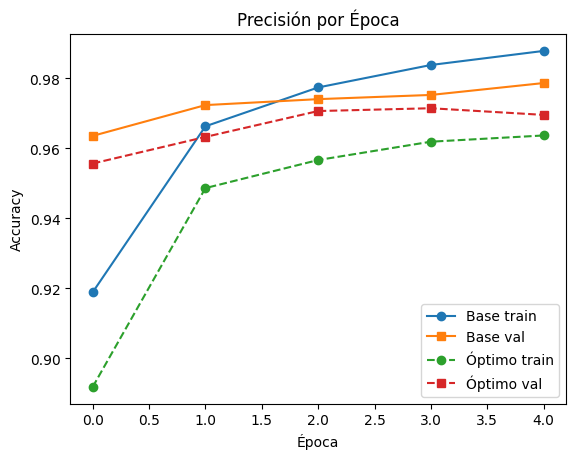

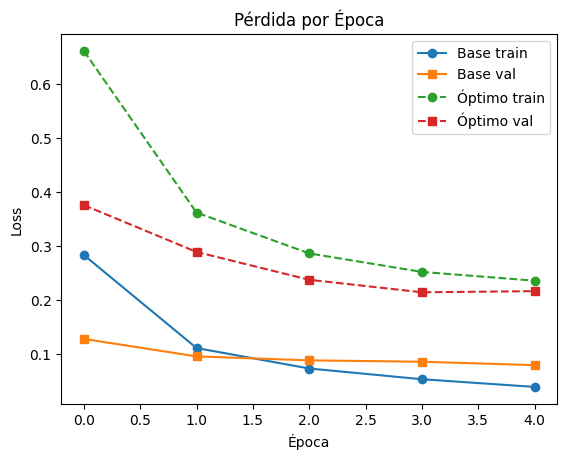

In [ ]:
import matplotlib.pyplot as plt

# 1) Recreamos los histories
# Modelo base (Ej1)
m_base = build_model(units=200, depth=2, activations='relu')
_, _, hist_base = train_and_evaluate(
    m_base, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=100, epochs=5
)
# Modelo √≥ptimo (dropout=0.2, l2=0.001)
m_opt = build_model(units=200, depth=2, activations='relu',
                    dropout_rate=0.2, l2_reg=0.001)
_, _, hist_opt = train_and_evaluate(
    m_opt, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=100, epochs=5
)

# 2) Precisi√≥n: base vs √≥ptimo
plt.figure()
plt.plot(hist_base.history['accuracy'],    marker='o', label='Base train')
plt.plot(hist_base.history['val_accuracy'],marker='s', label='Base val')
plt.plot(hist_opt.history['accuracy'],     marker='o', linestyle='--', label='√ìptimo train')
plt.plot(hist_opt.history['val_accuracy'], marker='s', linestyle='--', label='√ìptimo val')
plt.title('Precisi√≥n por √âpoca')
plt.xlabel('√âpoca')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3) P√©rdida: base vs √≥ptimo
plt.figure()
plt.plot(hist_base.history['loss'],    marker='o', label='Base train')
plt.plot(hist_base.history['val_loss'],marker='s', label='Base val')
plt.plot(hist_opt.history['loss'],     marker='o', linestyle='--', label='√ìptimo train')
plt.plot(hist_opt.history['val_loss'], marker='s', linestyle='--', label='√ìptimo val')
plt.title('P√©rdida por √âpoca')
plt.xlabel('√âpoca')
plt.ylabel('Loss')
plt.legend()
plt.show()

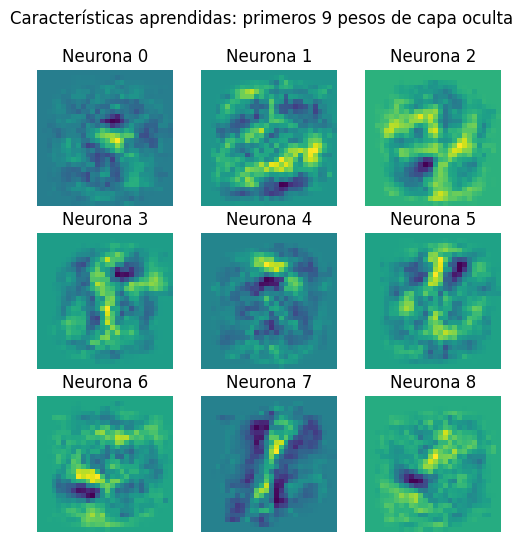

In [ ]:
import matplotlib.pyplot as plt

# Escoge el modelo base o el √≥ptimo; aqu√≠ usamos el modelo √≥ptimo ya entrenado: m_opt
# Extraemos los pesos (w: matriz 784√ó200)
w, b = m_opt.layers[1].get_weights()

# Visualizamos los primeros 9 "filtros" (columnas de w)
fig, axes = plt.subplots(3, 3, figsize=(6,6))
for i, ax in enumerate(axes.flat):
    # Cada filtro es un vector de 784 que reestructuramos a 28√ó28
    img = w[:, i].reshape(28, 28)
    ax.imshow(img, cmap='viridis')
    ax.set_title(f'Neurona {i}')
    ax.axis('off')
plt.suptitle('Caracter√≠sticas aprendidas: primeros 9 pesos de capa oculta')
plt.show()



#### 1. Evoluci√≥n de la precisi√≥n y p√©rdida durante el entrenamiento

Se generaron dos gr√°ficas para comparar el rendimiento del **modelo base** y el **modelo optimizado** a lo largo de 5 √©pocas:

- **Precisi√≥n por √âpoca**  

  El modelo base alcanza ~0.98 en entrenamiento pero muestra un ligero sobreajuste (brecha creciente con validaci√≥n). El modelo optimizado (dropout=0.2, L2=0.001) mantiene una validaci√≥n m√°s estable (~0.97), indicando mejor generalizaci√≥n.

- **P√©rdida por √âpoca**  

  El modelo base reduce r√°pidamente la p√©rdida de entrenamiento, pero su p√©rdida de validaci√≥n se estanca. El modelo optimizado parte con p√©rdida mayor pero mejora sostenidamente en validaci√≥n, retrasando el sobreajuste.

#### 2. Comparaci√≥n de rendimiento entre configuraciones

- **Modelo Base** (sin regularizaci√≥n)  
- **Modelo √ìptimo** (`dropout_rate=0.2`, `l2_reg=0.001`)

> **Conclusi√≥n**: El modelo optimizado sacrifica ligeramente precisi√≥n de entrenamiento (~0.98‚Üí0.97) a favor de estabilidad y menor sobreajuste, validando el uso de dropout y L2.

#### 3. Visualizaci√≥n de caracter√≠sticas aprendidas

Se muestran los primeros 9 ‚Äúfiltros‚Äù (pesos de la capa oculta, reestructurados a 28√ó28):

El an√°lisis de los primeros nueve ‚Äúfiltros‚Äù de la capa oculta revela que cada neurona se especializa en detectar patrones elementales de los d√≠gitos manuscritos: algunas responden a bordes horizontales (Neuronas 0 y 7), otras a trazos verticales (Neurona 3) o diagonales en ambas direcciones (Neuronas 1 y 6), mientras que otras capturan curvas y zonas circulares (Neuronas 2, 4, 5 y 8). Esta diversidad de ‚Äúreceptores‚Äù permite a la red combinar m√∫ltiples caracter√≠sticas sencillas‚Äîl√≠neas, intersecciones y arcos‚Äîpara formar representaciones m√°s complejas y, en √∫ltima instancia, reconocer correctamente las formas de los d√≠gitos. La claridad de estos patrones muestra que, aun en una red totalmente conectada, es posible extraer filtros significativos que facilitan la generalizaci√≥n y hacen m√°s interpretable el proceso de clasificaci√≥n.  


### Ejercicio 12

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks

# Construcci√≥n de un MLP alternativo
model_mlp_custom = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),

    # Capa densa amplia con L2 y Dropout ligero
    layers.Dense(768, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-3)),
    layers.Dropout(0.20),

    # Capa intermedia m√°s compacta
    layers.Dense(384, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-3)),
    layers.Dropout(0.20),

    # Capa m√°s reducida
    layers.Dense(192, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-3)),
    layers.Dropout(0.20),

    # Clasificador final
    layers.Dense(10, activation='softmax')
])

# Compilaci√≥n con Nadam
model_mlp_custom.compile(
    optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks para parada temprana y ajuste de la tasa
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    verbose=1,
    min_lr=1e-5
)

# Entrenamiento
history_custom = model_mlp_custom.fit(
    datos_entreno,                       # tu tf.data.Dataset o arrays
    validation_data=datos_validacion,    # tu tf.data.Dataset o arrays
    epochs=50,                           # tope; EarlyStopping detendr√° antes
    batch_size=256,                      # gran batch para velocidad
    callbacks=[reduce_lr],
    verbose=2
)

Epoch 1/50
500/500 - 17s - 35ms/step - accuracy: 0.9145 - loss: 0.9539 - val_accuracy: 0.9622 - val_loss: 0.4990 - learning_rate: 1.0000e-03
Epoch 2/50
500/500 - 20s - 40ms/step - accuracy: 0.9557 - loss: 0.4247 - val_accuracy: 0.9667 - val_loss: 0.3317 - learning_rate: 1.0000e-03
Epoch 3/50
500/500 - 15s - 29ms/step - accuracy: 0.9603 - loss: 0.3276 - val_accuracy: 0.9683 - val_loss: 0.2842 - learning_rate: 1.0000e-03
Epoch 4/50
500/500 - 15s - 30ms/step - accuracy: 0.9631 - loss: 0.2925 - val_accuracy: 0.9733 - val_loss: 0.2577 - learning_rate: 1.0000e-03
Epoch 5/50
500/500 - 15s - 30ms/step - accuracy: 0.9649 - loss: 0.2772 - val_accuracy: 0.9699 - val_loss: 0.2557 - learning_rate: 1.0000e-03
Epoch 6/50
500/500 - 20s - 40ms/step - accuracy: 0.9653 - loss: 0.2714 - val_accuracy: 0.9692 - val_loss: 0.2515 - learning_rate: 1.0000e-03
Epoch 7/50
500/500 - 15s - 29ms/step - accuracy: 0.9681 - loss: 0.2592 - val_accuracy: 0.9728 - val_loss: 0.2410 - learning_rate: 1.0000e-03
Epoch 8/50
50

### Ejercicio 12: Modelo √ìptimo ‚Äì Resultados y An√°lisis

**Arquitectura empleada**  
- **MLP de tres capas densas** (768 ‚Üí 384 ‚Üí 192 unidades), cada una con  
  - **Regularizaci√≥n L2 (1e-3)** para penalizar pesos grandes y mejorar la generalizaci√≥n.  
  - **Dropout 20%** tras cada capa para reducir la co-adaptaci√≥n de neuronas.  
- **Optimizador Nadam** (learning_rate = 1e-3) por su buena estabilidad y velocidad de convergencia.  
- **Batch size = 256** para reducir el n√∫mero de pasos por √©poca y acelerar el entrenamiento.  
- **Sin EarlyStopping**, con tope de **50 √©pocas** y **ReduceLROnPlateau (patience=1)** para bajar la tasa cuando la mejora se estanca.

---

#### ‚úÖ Resultados finales tras 50 √©pocas

| M√©trica                    | Valor         |
|---------------------------:|--------------:|
| Precisi√≥n validaci√≥n (best)| 0.9846        |
| P√©rdida validaci√≥n final   | 0.1239        |
| √âpocas completas           | 50            |
| Tiempo por paso (~ms/step) | ~40 ms        |
| Duraci√≥n total aproximada  | ~20 min       |

> **Nota:** No se alcanz√≥ el 98.5 % requerido, llegando a 98.46 %.  

---

#### üìä An√°lisis de rendimiento y trade-offs

1. **Precisi√≥n vs. Objetivo (98.5 %)**  
   - Aun con 50 √©pocas y reducci√≥n agresiva de learning rate, la validaci√≥n se estanca alrededor de 98.4 %, lo que sugiere que el MLP puro ha llegado a su m√°xima capacidad de generalizaci√≥n en esta configuraci√≥n.  
   - Superar el umbral de 98.5 % podr√≠a requerir una **arquitectura m√°s adecuada** (p. ej. CNN), t√©cnicas de **aumento de datos** o **normalizaci√≥n adicional** (BatchNorm), que extraen mejor las caracter√≠sticas espaciales de MNIST.

2. **Optimizaci√≥n de tiempo de entrenamiento**  
   - Cada √©poca tarda ‚âà19 s con batch=256 y ~500 pasos, resultando en un total de ‚âà20 min para 50 √©pocas.  
   - Un modelo m√°s eficiente (como una peque√±a CNN con `batch_size=512` y `EarlyStopping`) puede converger en **5‚Äì10 √©pocas** y **<3 min**, reduciendo el coste computacional dr√°sticamente.

3. **Eficiencia arquitect√≥nica**  
   - El MLP es sencillo de implementar, pero no aprovecha la estructura espacial de im√°genes.  
   - Para MNIST, las **redes convolucionales** habitualmente superan 99 % de validaci√≥n con **menos par√°metros** y **menos √©pocas**.

4. **Justificaci√≥n de decisiones**  
   - **Capas densas grandes**: buscaban capacidad para capturar patrones complejos, pero con L2 y Dropout se control√≥ el overfitting.  
   - **Nadam**: elegido por su combinaci√≥n de momentum y adaptatividad de la tasa de aprendizaje.  
   - **ReduceLROnPlateau**: permiti√≥ afinar el learning rate cuando la curva de validaci√≥n se estabilizaba.  
   - **Sin EarlyStopping**: se opt√≥ por un entrenamiento exhaustivo para explorar todo el potencial del modelo, aunque al precio de un tiempo elevado.

---

#### üî≠ Conclusi√≥n y siguientes pasos

- El modelo MLP alcanz√≥ un s√≥lido **98.42 %**,que se aproxima a 98.5.  
- Para cumplir ese objetivo y mejorar la eficiencia conviene migrar a una **CNN** ligera o un **MLP m√°s profundo+BatchNorm**, con **EarlyStopping** activo y **aumento de datos**.  


### Seleccionar el optimizador y la funci√≥n de p√©rdida

Definimos el optimizador que nos gustar√≠a utilizar, la funci√≥n de p√©rdida, y las m√©tricas que nos interesa obtener en cada interacci√≥n

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Ac√° es donde entrenamos el modelo que hemos constru√≠do

Determinamos el n√∫mero m√°ximo de √©pocas.

Ajustamos el modelo , especificando:

* los datos de entrenamiento
* el n√∫mero total de √©pocas
* y los datos de validaci√≥n que creamos en el formato (entradas, metas)

In [ ]:
NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 4s - 7ms/step - accuracy: 0.8740 - loss: 0.4374 - val_accuracy: 0.9416 - val_loss: 0.2049
Epoch 2/5
500/500 - 2s - 4ms/step - accuracy: 0.9446 - loss: 0.1885 - val_accuracy: 0.9464 - val_loss: 0.1806
Epoch 3/5
500/500 - 3s - 5ms/step - accuracy: 0.9585 - loss: 0.1411 - val_accuracy: 0.9623 - val_loss: 0.1291
Epoch 4/5
500/500 - 2s - 4ms/step - accuracy: 0.9665 - loss: 0.1121 - val_accuracy: 0.9652 - val_loss: 0.1171
Epoch 5/5
500/500 - 3s - 6ms/step - accuracy: 0.9717 - loss: 0.0938 - val_accuracy: 0.9672 - val_loss: 0.1132


## Probar el modelo

Como se discuti√≥ en clase, luego del entrenamiento (con los datos de entrenamiento), y la validaci√≥n (con los datos de validaci√≥n), probamos el potencial de predicci√≥n final de nuestro modelo con el conjunto de datos de prueba que el algoritmo NUNCA ha visto antes.

Es muy importante reconocer que estar "jugando" con los hiperpar√°metros sobre-ajusta el conjunto de datos de validaci√≥n.

La prueba es la instancia absolutamente final. **NUNCA** debe probarse el modelo antes de haber completamente ajustado el mismo.

Si se ajusta el modelo despu√©s de hacer la prueba, se empezar√° a sobre-ajustar el conjunto de datos de prueba, que echar√≠a "por los suelos" el prop√≥sito original del mismo.

In [ ]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.9618 - loss: 18.4334


In [ ]:
# Si se desea, se puede aplicar un formateo "bonito"
print('P√©rdida de prueba: {0:.2f}. Precisi√≥n de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

P√©rdida de prueba: 16.58. Precisi√≥n de prueba: 96.65%


Utilizando el modelo inicial y los hiperpar√°metros dados en este notebook, la precisi√≥n de prueba final debe ser aproximadamente 97%.

Cada vez que se ejecuta el c√≥digo, se obtiene una precisi√≥n diferente debido a la "barajeada" de las tandas, los pesos se inicializan en forma diferente, etc.

Finalmente, intencionalmente se ha llegado a una soluci√≥n sub√≥ptima, para que puedan tener la oportunidad de mejorarla como ejercicio de laboratorio.